In [1]:
!git clone https://github.com/SparklePh/Seagate_work_shop

Cloning into 'Seagate_work_shop'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 2), reused 22 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 114.33 MiB | 18.64 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
%cd /content/Seagate_work_shop

/content/Seagate_work_shop


Original Image (Loaded successfully):


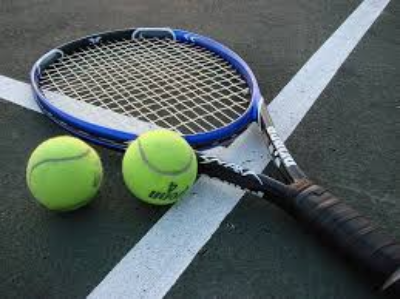

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Required for displaying images in Colab

# Define the image file path in Colab
img_path = "/content/Seagate_work_shop/data/Tennis_Ball.jpg"

# Use cv2.imread() to read the image file directly from the path
img = cv2.imread(img_path)

# Check if OpenCV successfully found and read the image
if img is None:
    print(f"❌ Image file not found or cannot be read! Please check if the file exists: {img_path}")
    print("💡 Tip: File names are case-sensitive (e.g., .jpg vs .JPG).")
else:
    # Resize the image to a width of 400px (adjusting height proportionally)
    height, width = img.shape[:2]
    new_width = 400
    new_height = int((new_width / width) * height)
    img = cv2.resize(img, (new_width, new_height))

    print("Original Image (Loaded successfully):")
    cv2_imshow(img)

In [4]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow

# Note: We DO NOT convert to HSV here. We use the original 'img' which is in BGR format.

def interactive_rgb_threshold(r_min, r_max, g_min, g_max, b_min, b_max):
    # OpenCV uses BGR order internally!
    # So we must pack the arrays as [Blue, Green, Red]
    lower_color = np.array([b_min, g_min, r_min])
    upper_color = np.array([b_max, g_max, r_max])

    # Create a binary mask directly from the BGR image
    mask = cv2.inRange(img, lower_color, upper_color)

    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Convert the single-channel mask to a 3-channel BGR image
    mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Stack the mask and the result horizontally for comparison
    combined_result = np.hstack((mask_bgr, result))

    # Clear the previous output so it doesn't stack images infinitely
    clear_output(wait=True)

    # Display the current BGR values and the combined image
    print(f"Current BGR Range -> Lower: [B:{b_min} G:{g_min} R:{r_min}]  |  Upper: [B:{b_max} G:{g_max} R:{r_max}]")
    print("Mask (Left) | Extracted Object (Right):")
    cv2_imshow(combined_result)

# Create interactive sliders for Red, Green, and Blue
# Max value for all RGB channels is 255
widgets.interact(interactive_rgb_threshold,
                 r_min=widgets.IntSlider(min=0, max=255, step=1, value=0, description='R Min'),
                 r_max=widgets.IntSlider(min=0, max=255, step=1, value=255, description='R Max'),
                 g_min=widgets.IntSlider(min=0, max=255, step=1, value=0, description='G Min'),
                 g_max=widgets.IntSlider(min=0, max=255, step=1, value=255, description='G Max'),
                 b_min=widgets.IntSlider(min=0, max=255, step=1, value=0, description='B Min'),
                 b_max=widgets.IntSlider(min=0, max=255, step=1, value=255, description='B Max'))

interactive(children=(IntSlider(value=0, description='R Min', max=255), IntSlider(value=255, description='R Ma…

<function __main__.interactive_rgb_threshold(r_min, r_max, g_min, g_max, b_min, b_max)>

In [5]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow

# Convert the image from BGR to HSV color space
# (Assuming 'img' is already loaded from the previous cell)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the function that will update whenever a slider is moved
def interactive_threshold(h_min, h_max, s_min, s_max, v_min, v_max):
    # Define the lower and upper bounds based on slider values
    lower_color = np.array([h_min, s_min, v_min])
    upper_color = np.array([h_max, s_max, v_max])

    # Create a binary mask
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Convert the single-channel mask to a 3-channel BGR image
    mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Stack the mask and the result horizontally for comparison
    combined_result = np.hstack((mask_bgr, result))

    # Clear the previous output so it doesn't stack images infinitely
    clear_output(wait=True)

    # Display the current HSV values and the combined image
    print(f"Current Range -> Lower: {lower_color}  |  Upper: {upper_color}")
    print("Mask (Left) | Extracted Object (Right):")
    cv2_imshow(combined_result)

# Create interactive sliders (Alternative to cv2.createTrackbar for Colab)
widgets.interact(interactive_threshold,
                 h_min=widgets.IntSlider(min=0, max=179, step=1, value=25, description='H Min'),
                 h_max=widgets.IntSlider(min=0, max=179, step=1, value=45, description='H Max'),
                 s_min=widgets.IntSlider(min=0, max=255, step=1, value=50, description='S Min'),
                 s_max=widgets.IntSlider(min=0, max=255, step=1, value=255, description='S Max'),
                 v_min=widgets.IntSlider(min=0, max=255, step=1, value=50, description='V Min'),
                 v_max=widgets.IntSlider(min=0, max=255, step=1, value=255, description='V Max'))

interactive(children=(IntSlider(value=25, description='H Min', max=179), IntSlider(value=45, description='H Ma…

<function __main__.interactive_threshold(h_min, h_max, s_min, s_max, v_min, v_max)>

Searching for objects with area > 500 pixels...
Found 2 object(s).
Cleaned Mask (Left) | Final Tagged Result (Right):


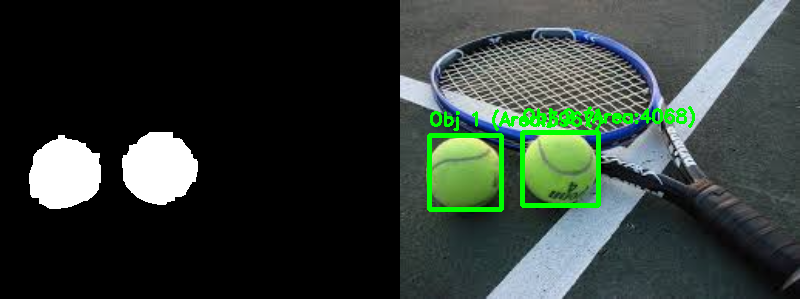

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- Configuration based on your slider results ---
# Replace these values with the ones you found best!
# Your provided values: Lower: [0 84 68] | Upper: [78 206 255]
best_lower = np.array([0, 84, 68])
best_upper = np.array([78, 206, 255])
min_object_area = 500  # Minimum area to be considered an object (filters noise)
# --------------------------------------------------

# Ensure HSV image exists (re-calculating just in case)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 1. Create the definitive Mask
mask = cv2.inRange(hsv, best_lower, best_upper)

# 2. Clean up the mask (Morphological Operations)
# This removes small white dots (noise) and fills small black holes
kernel = np.ones((5, 5), np.uint8)
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove outer noise
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel) # Fill inner holes

# 3. Find Contours (boundaries of white objects in the mask)
# RETR_EXTERNAL retrieves only the extreme outer flags.
contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw on
output_img = img.copy()
object_count = 0

print(f"Searching for objects with area > {min_object_area} pixels...")

# 4. Iterate through found contours
for cnt in contours:
    area = cv2.contourArea(cnt)

    # Filter out small noise based on area
    if area > min_object_area:
        object_count += 1

        # 5. Get Bounding Box coordinates (x, y, width, height)
        x, y, w, h = cv2.boundingRect(cnt)

        # Draw the rectangle (Green color in BGR, thickness 3)
        cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Add a label above the box
        label = f"Obj {object_count} (Area:{int(area)})"
        cv2.putText(output_img, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

print(f"Found {object_count} object(s).")
print("Cleaned Mask (Left) | Final Tagged Result (Right):")

# Show the cleaned mask alongside the final result
mask_display = cv2.cvtColor(mask_cleaned, cv2.COLOR_GRAY2BGR)
combined_final = np.hstack((mask_display, output_img))
cv2_imshow(combined_final)

In [7]:
import os
import subprocess
import base64
from IPython.display import HTML, display


# --- 1. Define Paths ---
input_video_path = '/content/Seagate_work_shop/data/Tennis_Ball_video.mp4'# The original video you want to convert
web_ready_video = '/content/Seagate_work_shop/data/Tennis_Ball_video_Web.mp4' # The new web-friendly video

# --- 2. Convert to Web-Friendly Format (H.264) using FFmpeg ---
print("⏳ Converting video for Web playback...")

# The '-vcodec libx264' is the magic command that makes it playable on browsers
subprocess.run([
    'ffmpeg', '-y', '-loglevel', 'error',
    '-i', input_video_path,
    '-vcodec', 'libx264',
    web_ready_video
])

# --- 3. Display the video in Colab using HTML ---
if os.path.exists(web_ready_video) and os.path.getsize(web_ready_video) > 0:
    print("✅ Conversion successful! Loading player...")

    # Read and encode the video to Base64
    video_file = open(web_ready_video, "rb").read()
    video_base64 = base64.b64encode(video_file).decode()

    # Create HTML Video Player
    video_html = f'''
    <video width="640" controls autoplay muted>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    '''
    display(HTML(video_html))
else:
    print("❌ Conversion failed. Please check if the input file exists.")

⏳ Converting video for Web playback...
✅ Conversion successful! Loading player...


In [8]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow
import os

# Use the video file with the fixed codec from the previous step
fixed_video = '/content/Seagate_work_shop/data/Tennis_Ball_video.mp4'

if not os.path.exists(fixed_video):
    print("❌ Video file not found. Please run the previous cell to fix the video codec first.")
else:
    cap = cv2.VideoCapture(fixed_video)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames <= 0: total_frames = 100

    ret, initial_frame = cap.read()

    # --- 1. Create Play button and link it to the Frame Slider ---
    # interval=150 is the playback speed (150 ms/frame). Decrease the value for faster playback.
    play_button = widgets.Play(value=0, min=0, max=total_frames-2, step=1, interval=150, description="Play")
    frame_slider = widgets.IntSlider(min=0, max=total_frames-2, step=1, description='🎬 Frame')

    # Link the Play button to the frame slider value so they move together
    widgets.jslink((play_button, 'value'), (frame_slider, 'value'))

    # Create sliders for HSV color bounds
    h_min_w = widgets.IntSlider(min=0, max=179, step=1, value=25, description='H Min')
    h_max_w = widgets.IntSlider(min=0, max=179, step=1, value=45, description='H Max')
    s_min_w = widgets.IntSlider(min=0, max=255, step=1, value=50, description='S Min')
    s_max_w = widgets.IntSlider(min=0, max=255, step=1, value=255, description='S Max')
    v_min_w = widgets.IntSlider(min=0, max=255, step=1, value=50, description='V Min')
    v_max_w = widgets.IntSlider(min=0, max=255, step=1, value=255, description='V Max')

    # --- 2. Processing function ---
    def process_video_realtime(frame_idx, h_min, h_max, s_min, s_max, v_min, v_max):
        # Jump to the selected frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        # Fallback to the initial frame if reading fails
        if not ret: frame = initial_frame.copy()

        # Resize the frame for smoother processing in Colab
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (400, int((400 / width) * height)))

        # Convert to HSV color space
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_color = np.array([h_min, s_min, v_min])
        upper_color = np.array([h_max, s_max, v_max])

        # Create mask
        mask = cv2.inRange(hsv, lower_color, upper_color)

        # Remove noise using morphological operations (Open and Close)
        kernel = np.ones((5, 5), np.uint8)
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

        # Find contours and draw bounding boxes
        contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        output_frame = frame.copy()

        for cnt in contours:
            if cv2.contourArea(cnt) > 200: # Filter out small noise
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(output_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Convert mask to 3 channels so we can stack it horizontally with the original frame
        mask_bgr = cv2.cvtColor(mask_cleaned, cv2.COLOR_GRAY2BGR)
        combined = np.hstack((mask_bgr, output_frame))

        # Print the current HSV values and display the image
        clear_output(wait=True)
        print(f"📌 Copy these values for tracking -> Lower: {lower_color} | Upper: {upper_color}")
        cv2_imshow(combined)

    # --- 3. Arrange the UI layout and display ---
    out = widgets.interactive_output(process_video_realtime, {
        'frame_idx': frame_slider,
        'h_min': h_min_w, 'h_max': h_max_w,
        's_min': s_min_w, 's_max': s_max_w,
        'v_min': v_min_w, 'v_max': v_max_w
    })

    # Group the Play button and Frame slider horizontally
    play_box = widgets.HBox([play_button, frame_slider])

    # Stack everything vertically
    ui = widgets.VBox([play_box, h_min_w, h_max_w, s_min_w, s_max_w, v_min_w, v_max_w])

    display(ui, out)

Output()

In [3]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow
import os

# Use the video file with the fixed codec from the previous step
fixed_video = '/content/Seagate_work_shop/data/highway.mp4'

if not os.path.exists(fixed_video):
    print("❌ Video file not found. Please run the previous cell to fix the video codec first.")
else:
    cap = cv2.VideoCapture(fixed_video)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames <= 0: total_frames = 100

    ret, initial_frame = cap.read()

    # --- 1. Create Play button and link it to the Frame Slider ---
    # interval=150 is the playback speed (150 ms/frame). Decrease the value for faster playback.
    play_button = widgets.Play(value=0, min=0, max=total_frames-2, step=1, interval=150, description="Play")
    frame_slider = widgets.IntSlider(min=0, max=total_frames-2, step=1, description='🎬 Frame')

    # Link the Play button to the frame slider value so they move together
    widgets.jslink((play_button, 'value'), (frame_slider, 'value'))

    # Create sliders for HSV color bounds
    h_min_w = widgets.IntSlider(min=0, max=179, step=1, value=25, description='H Min')
    h_max_w = widgets.IntSlider(min=0, max=179, step=1, value=45, description='H Max')
    s_min_w = widgets.IntSlider(min=0, max=255, step=1, value=50, description='S Min')
    s_max_w = widgets.IntSlider(min=0, max=255, step=1, value=255, description='S Max')
    v_min_w = widgets.IntSlider(min=0, max=255, step=1, value=50, description='V Min')
    v_max_w = widgets.IntSlider(min=0, max=255, step=1, value=255, description='V Max')

    # --- 2. Processing function ---
    def process_video_realtime(frame_idx, h_min, h_max, s_min, s_max, v_min, v_max):
        # Jump to the selected frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        # Fallback to the initial frame if reading fails
        if not ret: frame = initial_frame.copy()

        # Resize the frame for smoother processing in Colab
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (400, int((400 / width) * height)))

        # Convert to HSV color space
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_color = np.array([h_min, s_min, v_min])
        upper_color = np.array([h_max, s_max, v_max])

        # Create mask
        mask = cv2.inRange(hsv, lower_color, upper_color)

        # Remove noise using morphological operations (Open and Close)
        kernel = np.ones((5, 5), np.uint8)
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

        # Find contours and draw bounding boxes
        contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        output_frame = frame.copy()

        for cnt in contours:
            if cv2.contourArea(cnt) > 200: # Filter out small noise
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(output_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Convert mask to 3 channels so we can stack it horizontally with the original frame
        mask_bgr = cv2.cvtColor(mask_cleaned, cv2.COLOR_GRAY2BGR)
        combined = np.hstack((mask_bgr, output_frame))

        # Print the current HSV values and display the image
        clear_output(wait=True)
        print(f"📌 Copy these values for tracking -> Lower: {lower_color} | Upper: {upper_color}")
        cv2_imshow(combined)

    # --- 3. Arrange the UI layout and display ---
    out = widgets.interactive_output(process_video_realtime, {
        'frame_idx': frame_slider,
        'h_min': h_min_w, 'h_max': h_max_w,
        's_min': s_min_w, 's_max': s_max_w,
        'v_min': v_min_w, 'v_max': v_max_w
    })

    # Group the Play button and Frame slider horizontally
    play_box = widgets.HBox([play_button, frame_slider])

    # Stack everything vertically
    ui = widgets.VBox([play_box, h_min_w, h_max_w, s_min_w, s_max_w, v_min_w, v_max_w])

    display(ui, out)

Output()